In [2]:
# --- Imports ---
import os
import sys
import random
import pickle
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from env_romo import WorkingMemoryEnv
from actor_critic_song import ActorCriticAgent
from reinforce_song import train_agent
from helper_functions import plot_metrics, plot_performance_matrix, plot_mean_firing_rate_trace, load_model, save_model

# --- Set Random Seeds ---
seed_value = 1
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

print("Setup Complete.")

2025-08-21 11:58:39.509148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755770322.835800  123498 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755770323.663379  123498 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755770332.364006  123498 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755770332.364078  123498 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755770332.364083  123498 computation_placer.cc:177] computation placer alr

Added '/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules' to sys.path
Setup Complete.


Configuration loaded:
  dt: 10
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  input_noise_sigma: 0.01
  reward_fixation: 0.1
  reward_decide_fixation: -0.1
  duration_params: [10, 10, 10, 10, 10, 10]
  actor_hidden_size: 64
  critic_hidden_size: 64
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  num_episodes: 20000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: True

Creating WorkingMemory environment...
Observation size: 3, Action size: 3

Initializing Actor-Critic Agent...


2025-08-05 12:30:02.449675: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Agent Initialized.

Starting training for 20000 episodes...
Episode 100	Total Reward: -0.80	State [1. 0. 0.]	Actor Loss: -0.9547	Critic Loss: 0.7631	Actions: [0, 0, 1]	M: N/A	Tau: N/A	
Episode 200	Total Reward: -1.00	State [1. 0. 0.]	Actor Loss: -1.0440	Critic Loss: 0.9036	Actions: [2]	M: N/A	Tau: N/A	
Episode 300	Total Reward: -1.00	State [1. 0. 0.]	Actor Loss: -1.0073	Critic Loss: 0.8333	Actions: [2]	M: N/A	Tau: N/A	
Episode 400	Total Reward: -1.00	State [1. 0. 0.]	Actor Loss: -0.9496	Critic Loss: 0.7353	Actions: [2]	M: N/A	Tau: N/A	
Episode 500	Total Reward: -1.00	State [1. 0. 0.]	Actor Loss: -0.8501	Critic Loss: 0.5856	Actions: [2]	M: N/A	Tau: N/A	
Episode 600	Total Reward: -1.00	State [1. 0. 0.]	Actor Loss: -0.7329	Critic Loss: 0.4371	Actions: [1]	M: N/A	Tau: N/A	
Episode 700	Total Reward: -0.90	State [1. 0. 0.]	Actor Loss: -0.2892	Critic Loss: 0.1159	Actions: [0, 2]	M: N/A	Tau: N/A	
Episode 800	Total Reward: -1.00	State [1. 0. 0.]	Actor Loss: -0.3612	Critic Loss: 0.1065	Actions: 

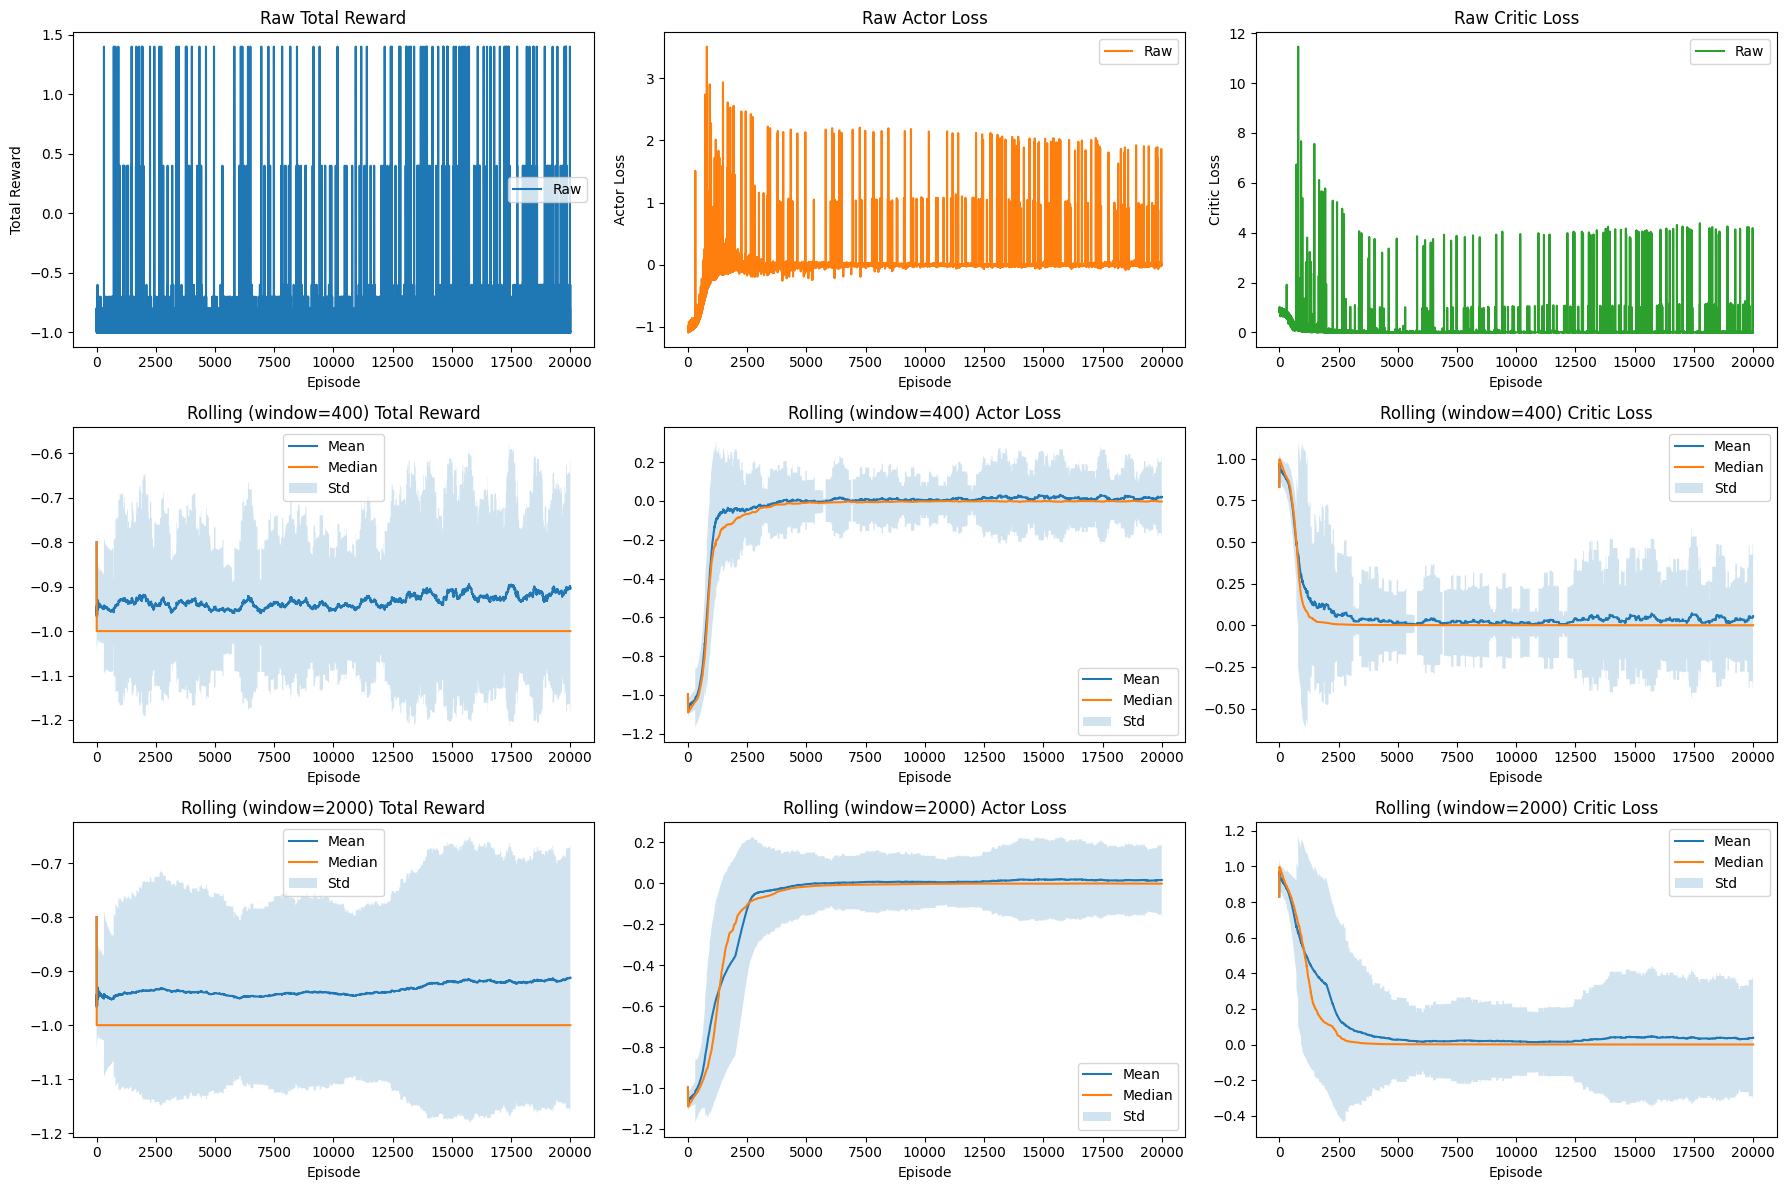

/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules/helper_functions.py:937: RuntimeWarning: Mean of empty slice
  mean_rate_per_episode = np.nanmean(firing_rates, axis=0)


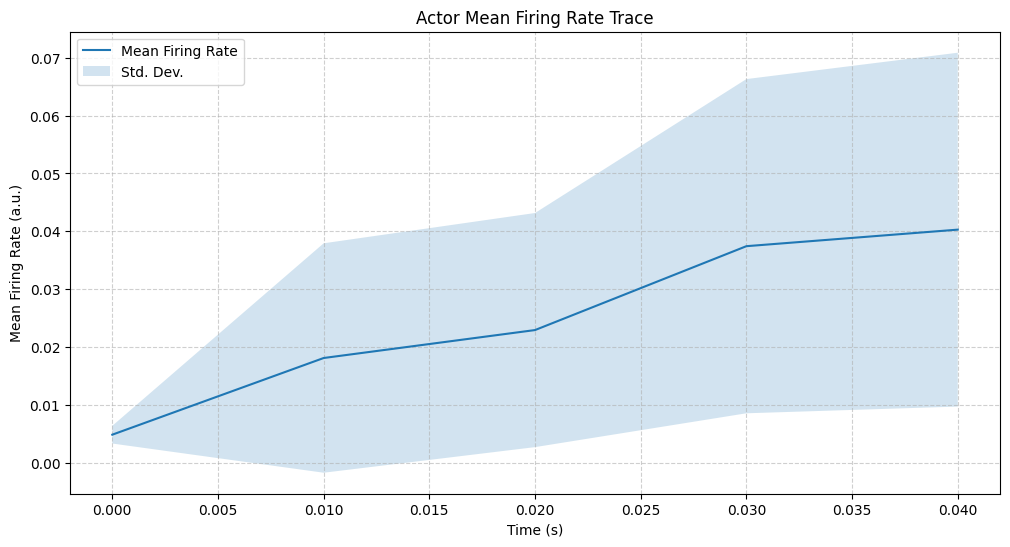


Closing the environment...
Environment closed.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 64,
        "critic_hidden_size": 64,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "num_episodes": 20000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 1
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM_F_rnn.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  input_noise_sigma: 0.01
  reward_fixation: 0.1
  reward_decide_fixation: -0.1
  duration_params: [10, 10, 10, 10, 10, 10]
  actor_hidden_size: 64
  critic_hidden_size: 64
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: True

Creating WorkingMemory environment...
Observation size: 3, Action size: 3

Initializing Actor-Critic Agent...


2025-08-05 15:08:36.962928: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 1...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/WM_F_rnn_1/ckpt-1
Checkpoint restored successfully.

Starting training for 10000 episodes...
Episode 100	Total Reward: -0.90	State [1.        2.7725902 0.       ]	Actor Loss: -0.0353	Critic Loss: 0.0029	Actions: [0, 2]	M: N/A	Tau: N/A	
Episode 200	Total Reward: -1.00	State [1. 0. 0.]	Actor Loss: 0.0077	Critic Loss: 0.0006	Actions: [1]	M: N/A	Tau: N/A	
Episode 300	Total Reward: -1.00	State [1. 0. 0.]	Actor Loss: -0.0015	Critic Loss: 0.0005	Actions: [2]	M: N/A	Tau: N/A	
Episode 400	Total Reward: -1.00	State [1. 0. 0.]	Actor Loss: 0.0027	Critic Loss: 0.0005	Actions: [1]	M: N/A	Tau: N/A	
Episode 500	Total Reward: -1.00	State [1. 0. 0.]	Actor Loss: -0.0001	Critic Loss: 0.0005	Actions: [2]	M: N/A	Tau: N/A	
Episode 600	Tota

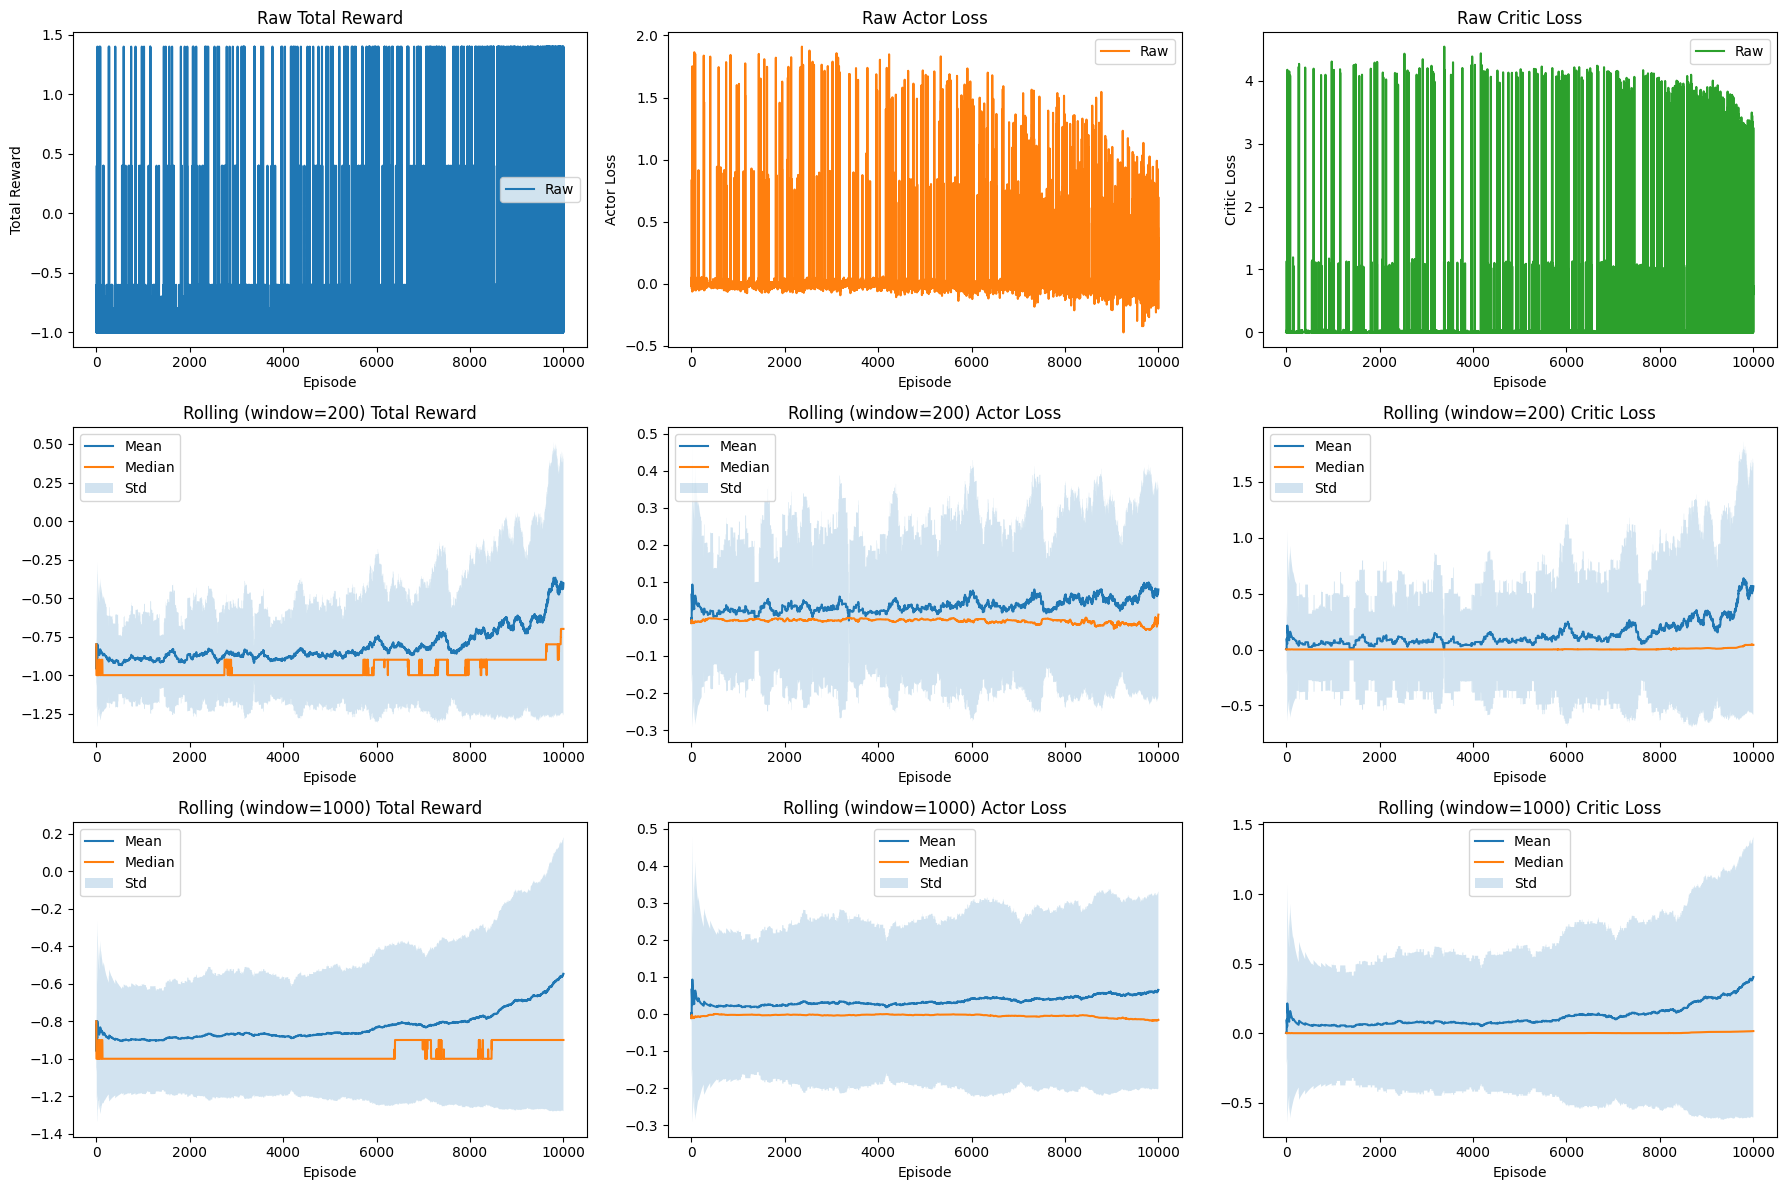

/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules/helper_functions.py:937: RuntimeWarning: Mean of empty slice
  mean_rate_per_episode = np.nanmean(firing_rates, axis=0)


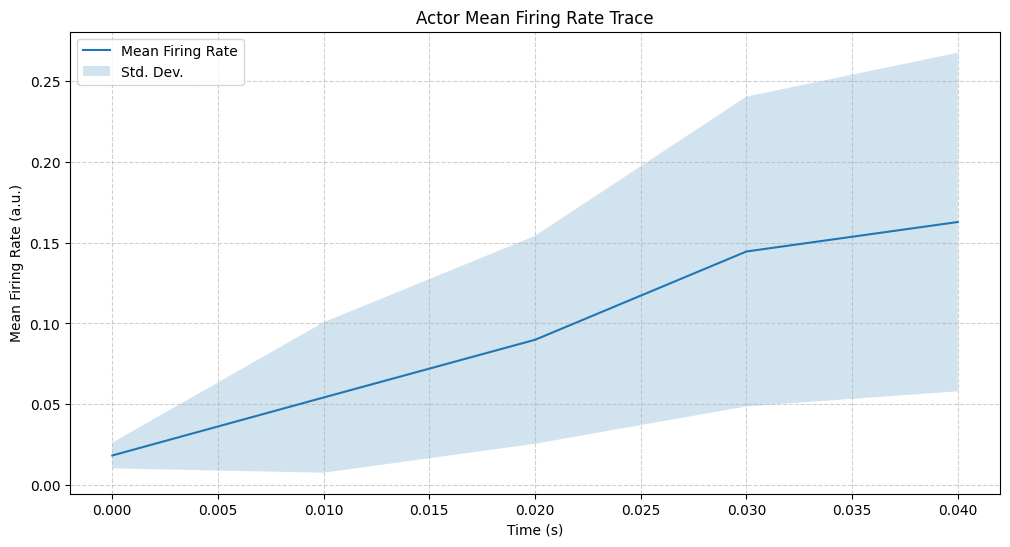


Closing the environment...
Environment closed.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 64,
        "critic_hidden_size": 64,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 2
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 2
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM_F_rnn_2.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  input_noise_sigma: 0.01
  reward_fixation: 0.1
  reward_decide_fixation: -0.1
  duration_params: [10, 10, 10, 10, 10, 10]
  actor_hidden_size: 64
  critic_hidden_size: 64
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: True

Creating WorkingMemory environment...
Observation size: 3, Action size: 3

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 2...
Masks loaded.
Initializing optimizers with dummy step...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Optimizers initialized.
Restoring from checkpoint: checkpoints/WM_F_rnn_2/ckpt-1
Checkpoint restored successfully.

Starting training for 10000 episodes...
Episode 100	Total Reward: -0.70	State [ 1.       19.513206  0.      ]	Actor Loss: -0.1782	Critic Loss: 0.0756	Actions: [0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 200	Total Reward: -0.80	State [1. 0. 0.]	Actor Loss: -0.1644	Critic Loss: 0.0518	Actions: [0, 0, 1]	M: N/A	Tau: N/A	
Episode 300	Total Reward: -1.00	State [1. 0. 0.]	Actor Loss: 0.0208	Critic Loss: 0.0007	Actions: [1]	M: N/A	Tau: N/A	
Episode 400	Total Reward: -1.00	State [1. 0. 0.]	Actor Loss: 0.0153	Critic Loss: 0.0006	Actions: [2]	M: N/A	Tau: N/A	
Episode 500	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.7762	Critic Loss: 2.7096	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 600	Total Reward: -0.90	State [ 1.       20.292124  0.      ]	Actor Loss: -0.0953	Critic Loss: 0.0762	Actions: [0, 1]	M: N/A	Tau: N/A	
Episode 700	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.

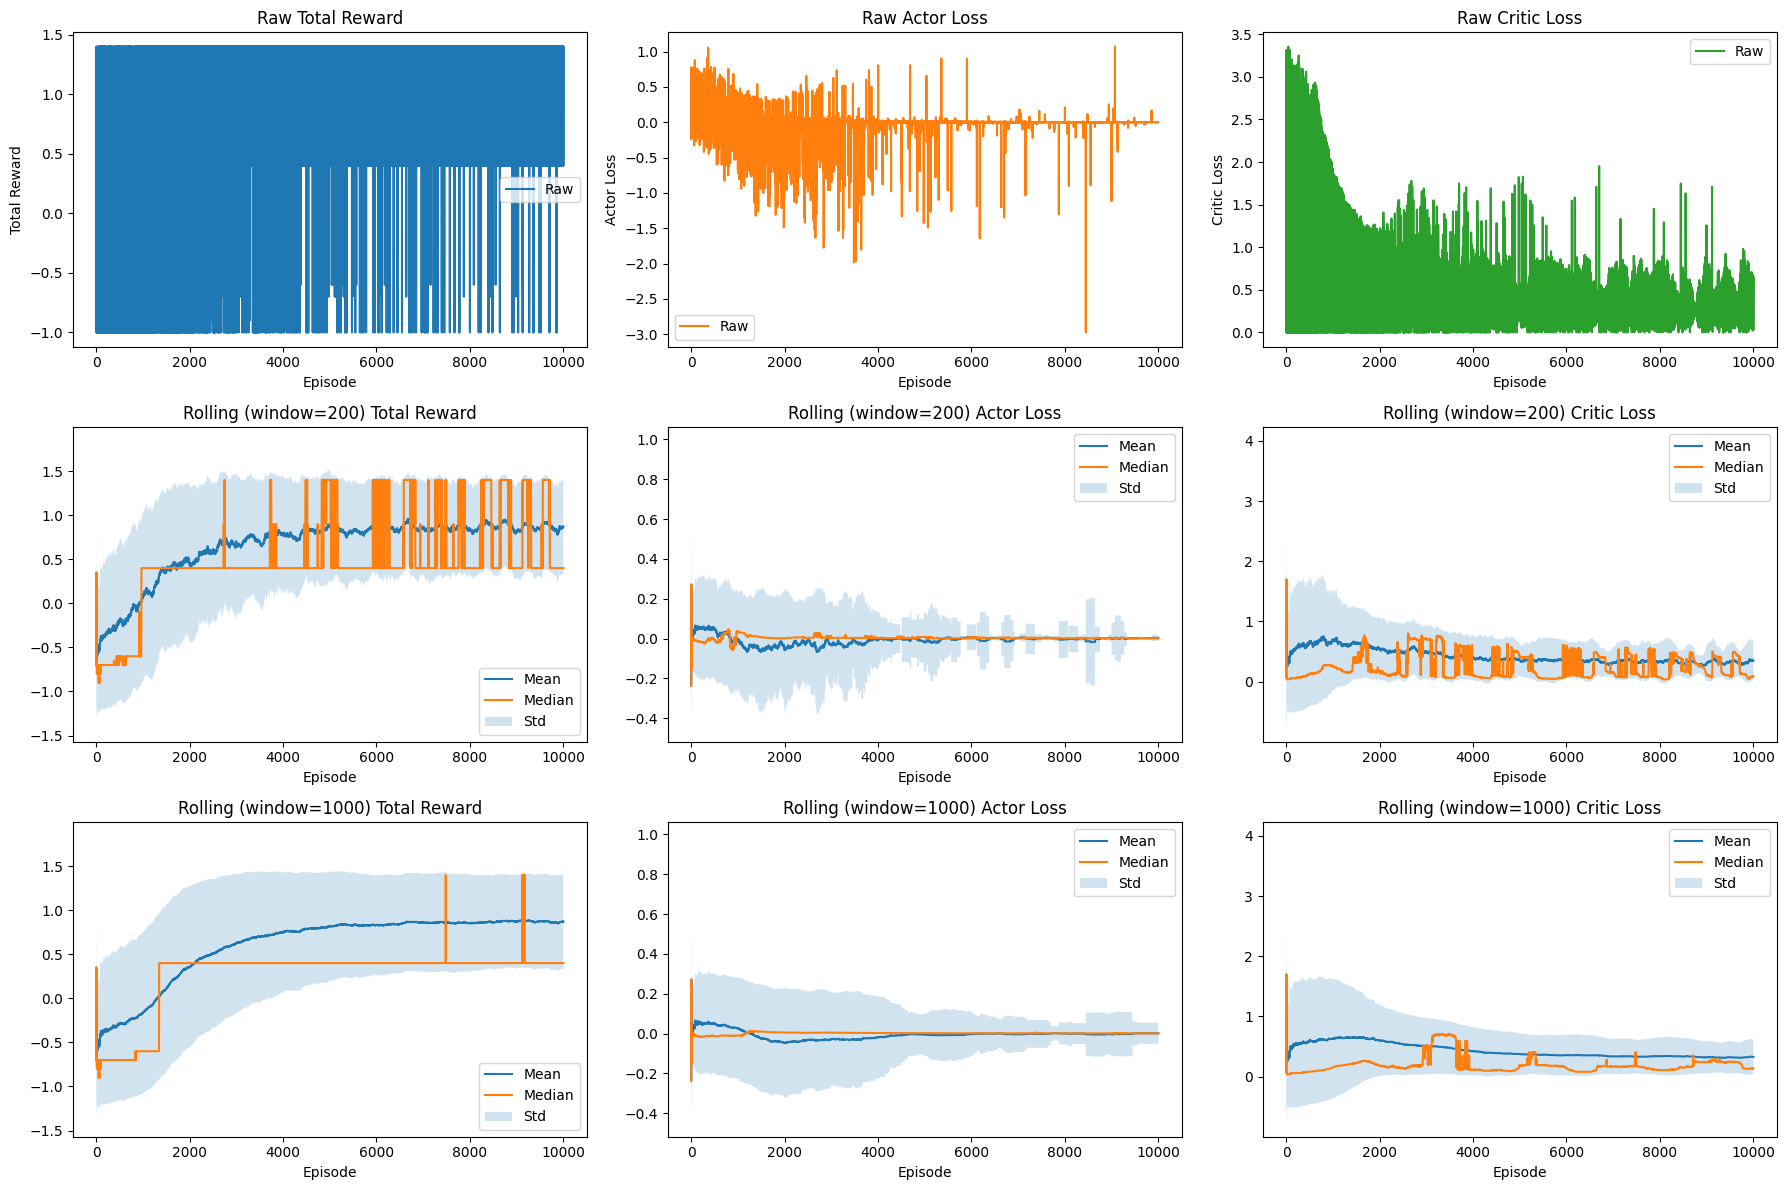

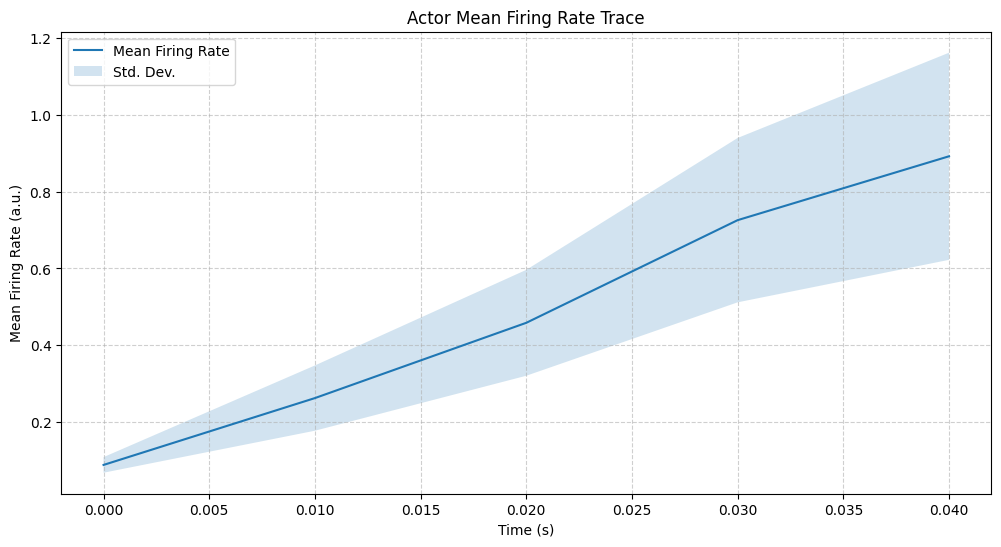


Closing the environment...
Environment closed.


In [3]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 64,
        "critic_hidden_size": 64,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 3
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 3
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM_F_rnn_3.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  input_noise_sigma: 0.01
  reward_fixation: 0.1
  reward_decide_fixation: -0.1
  duration_params: [10, 10, 10, 10, 10, 10]
  actor_hidden_size: 64
  critic_hidden_size: 64
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: True

Creating WorkingMemory environment...
Observation size: 3, Action size: 3

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Loading masks from stage 3...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/WM_F_rnn_3/ckpt-1
Checkpoint restored successfully.

Starting training for 10000 episodes...
Episode 100	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: 0.0007	Critic Loss: 0.0330	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 200	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: 0.0008	Critic Loss: 0.0378	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 300	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0023	Critic Loss: 0.7393	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 400	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0020	Critic Loss: 0.7070	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 500	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: 0.0007	Critic Loss: 0.0262	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 600	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: 0.0008	Critic Loss: 0.0300	Actions: [0, 0, 0, 0, 1]	

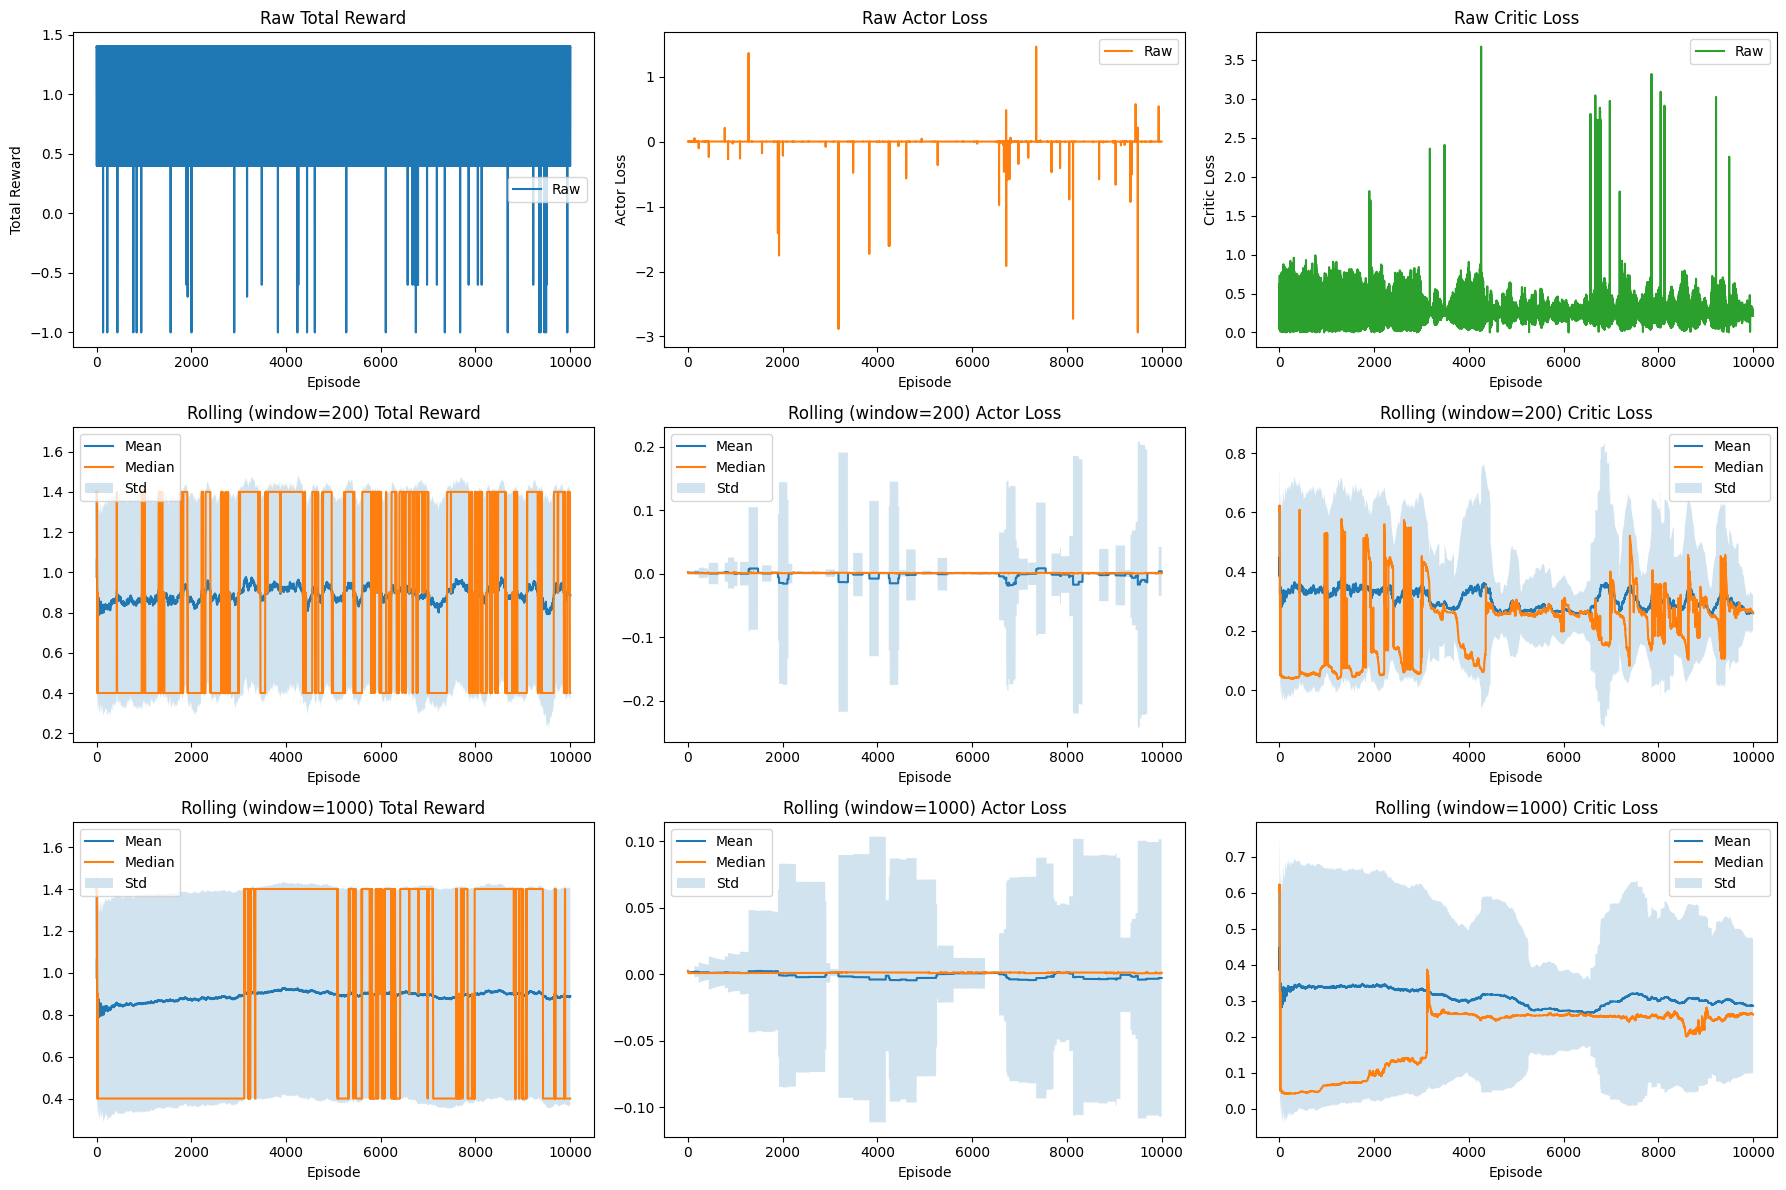

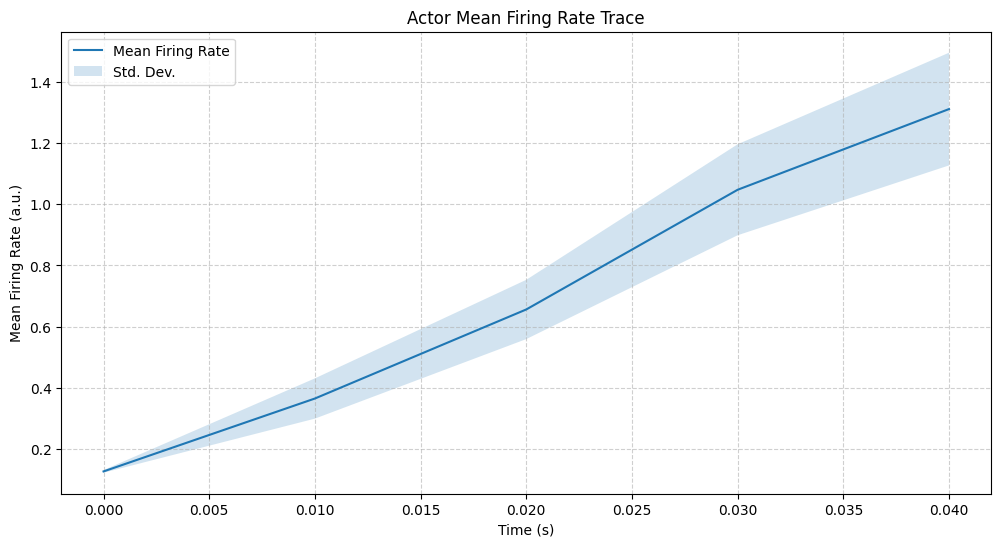


Closing the environment...
Environment closed.


In [4]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 64,
        "critic_hidden_size": 64,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 4
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 4
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM_F_rnn_4.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  input_noise_sigma: 0.01
  reward_fixation: 0.1
  reward_decide_fixation: -0.1
  duration_params: [10, 10, 10, 10, 10, 10]
  actor_hidden_size: 64
  critic_hidden_size: 64
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: True

Creating WorkingMemory environment...
Observation size: 3, Action size: 3

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...


2025-08-06 01:22:55.025891: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Loading masks from stage 4...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/WM_F_rnn_4/ckpt-1
Checkpoint restored successfully.

Starting training for 10000 episodes...
Episode 100	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: 0.0005	Critic Loss: 0.2669	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 200	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: 0.0004	Critic Loss: 0.4733	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 300	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: 0.0004	Critic Loss: 0.7095	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 400	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0016	Critic Loss: 0.0528	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 500	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0012	Critic Loss: 0.1680	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 600	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: 0.0004	Critic Loss: 0.4143	Actions: [0, 0, 0, 0, 1]	

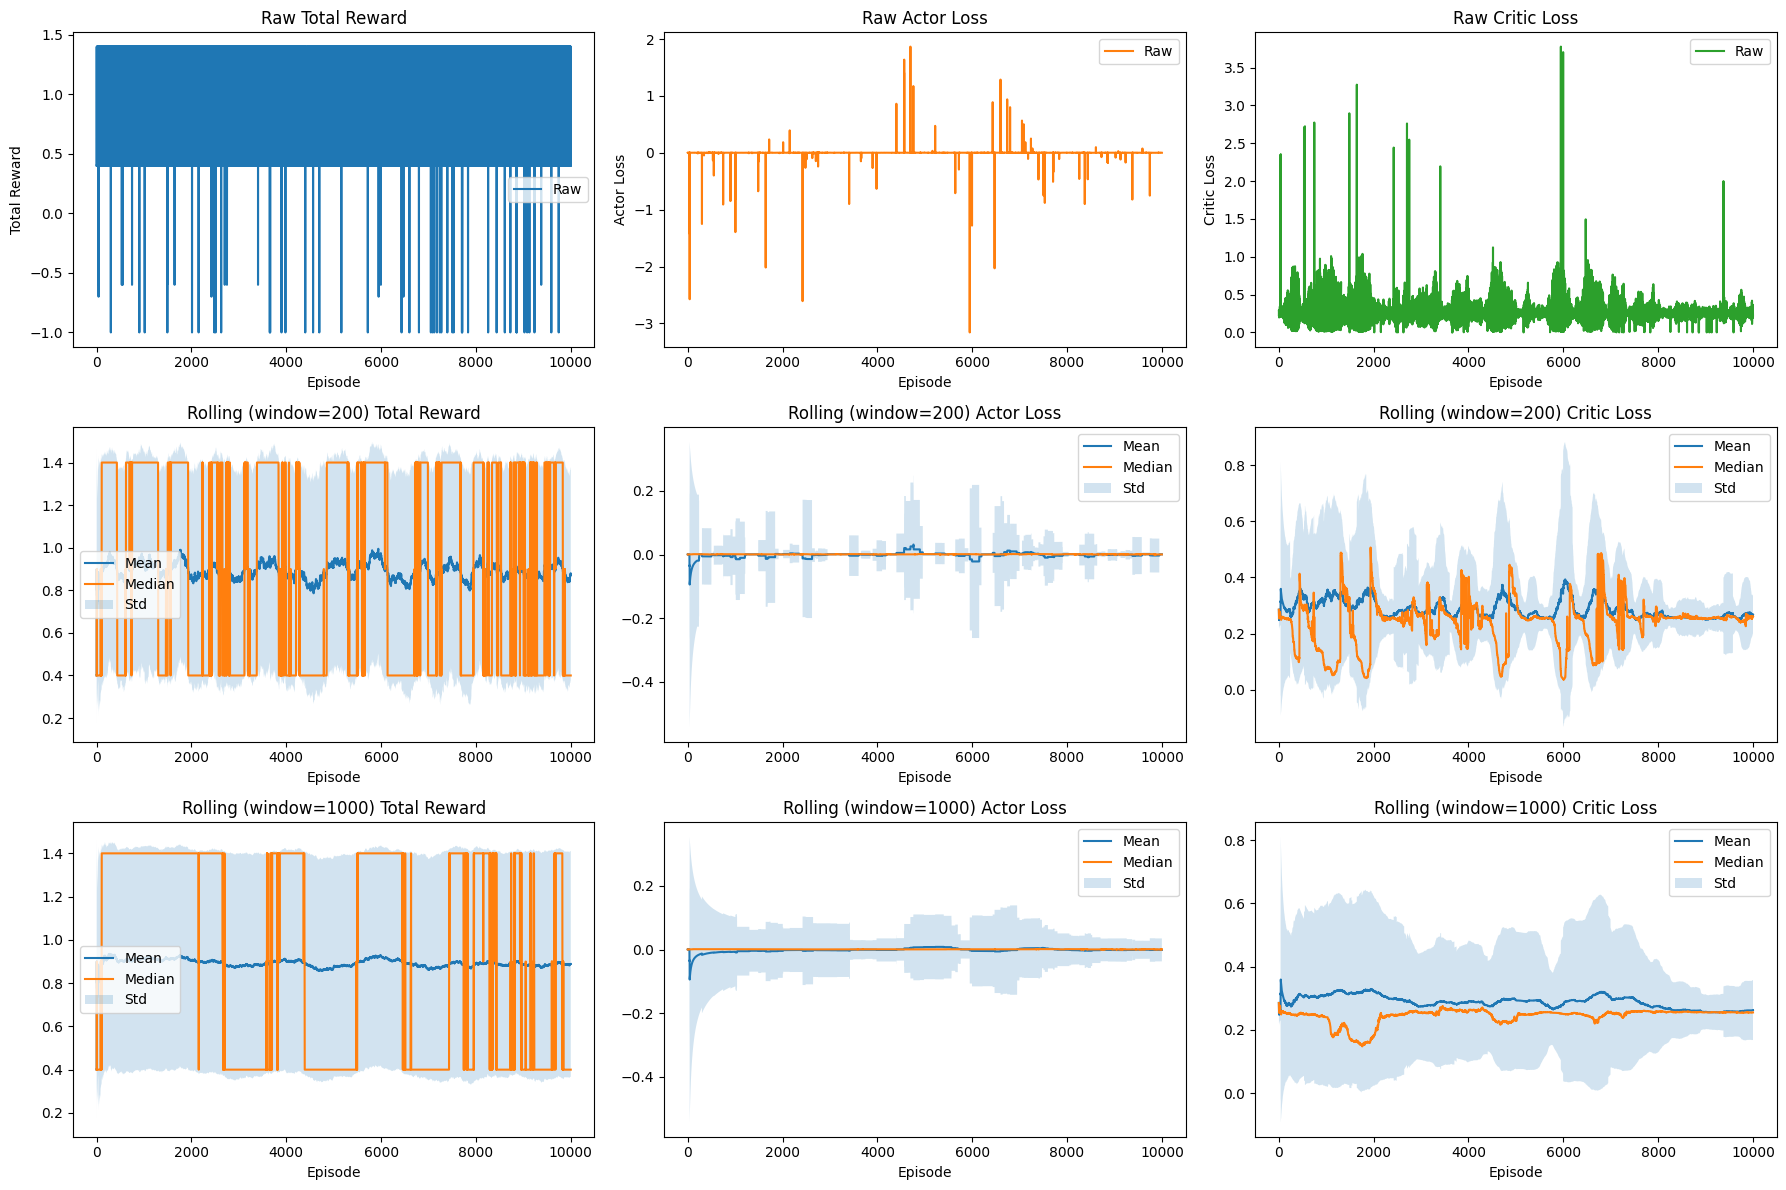

/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules/helper_functions.py:937: RuntimeWarning: Mean of empty slice
  mean_rate_per_episode = np.nanmean(firing_rates, axis=0)


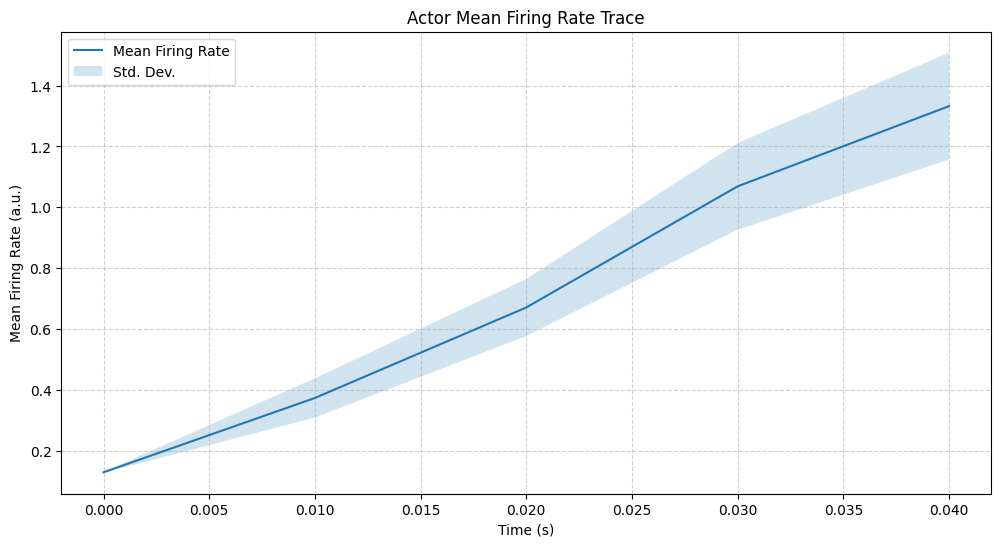


Closing the environment...
Environment closed.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 64,
        "critic_hidden_size": 64,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 5
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 5
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM_F_rnn_5.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  input_noise_sigma: 0.05
  reward_fixation: 0.1
  reward_decide_fixation: -0.1
  duration_params: [10, 10, 10, 10, 10, 10]
  actor_hidden_size: 64
  critic_hidden_size: 64
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: True

Creating WorkingMemory environment...
Observation size: 3, Action size: 3

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 5...
Masks loaded.
Initializing optimizers with dummy step...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Optimizers initialized.
Restoring from checkpoint: checkpoints/WM_F_rnn_5/ckpt-1
Checkpoint restored successfully.

Starting training for 10000 episodes...
Episode 100	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0012	Critic Loss: 0.2089	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 200	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0013	Critic Loss: 0.2309	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 300	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: 0.0002	Critic Loss: 0.3461	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 400	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: 0.0002	Critic Loss: 0.6019	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 500	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: 0.0002	Critic Loss: 0.3831	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 600	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0013	Critic Loss: 0.2915	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 700	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0012	Cri

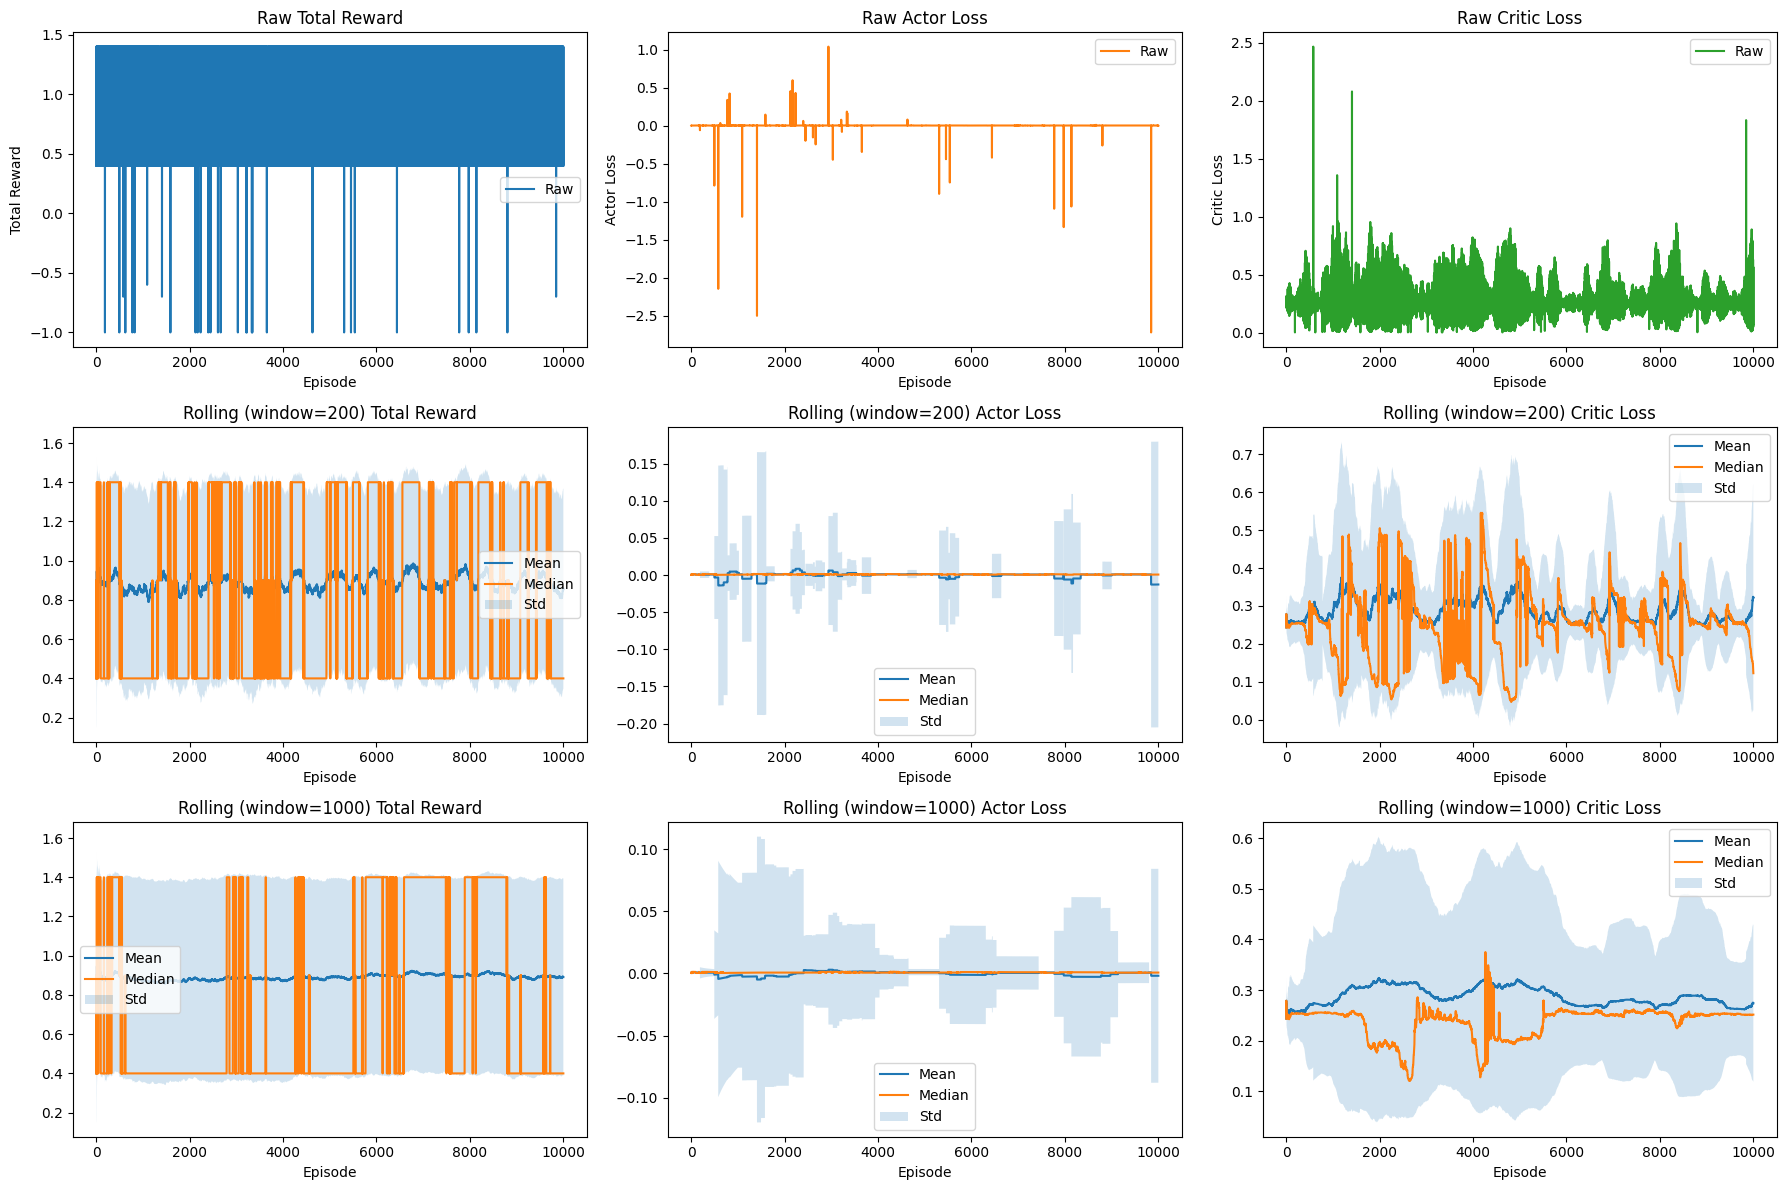

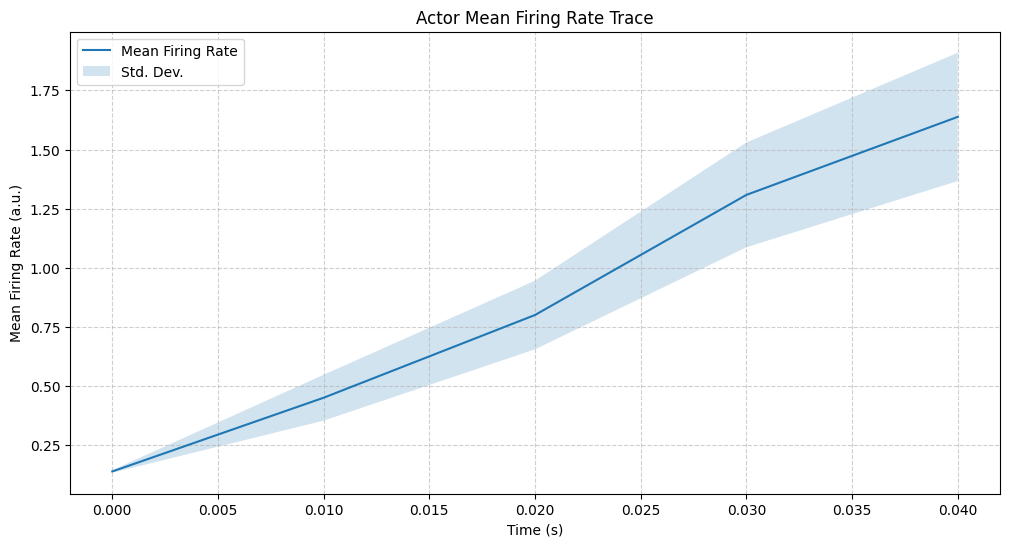


Closing the environment...
Environment closed.


In [3]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.05,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 64,
        "critic_hidden_size": 64,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 6
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 6
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM_F_rnn_6.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  input_noise_sigma: 0.05
  reward_fixation: 0.1
  reward_decide_fixation: -0.1
  duration_params: [10, 10, 10, 10, 10, 10]
  actor_hidden_size: 64
  critic_hidden_size: 64
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: True

Creating WorkingMemory environment...
Observation size: 3, Action size: 3

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 6...
Masks loaded.
Initializing optimizers with dummy step...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Optimizers initialized.
Restoring from checkpoint: checkpoints/WM_F_rnn_6/ckpt-1
Checkpoint restored successfully.

Starting training for 10000 episodes...
Episode 100	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: 0.0006	Critic Loss: 0.0629	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 200	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: 0.0006	Critic Loss: 0.0618	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 300	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0012	Critic Loss: 0.5415	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 400	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0012	Critic Loss: 0.7692	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 500	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0014	Critic Loss: 0.7143	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 600	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: 0.0005	Critic Loss: 0.0833	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 700	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: 0.0005	Cri

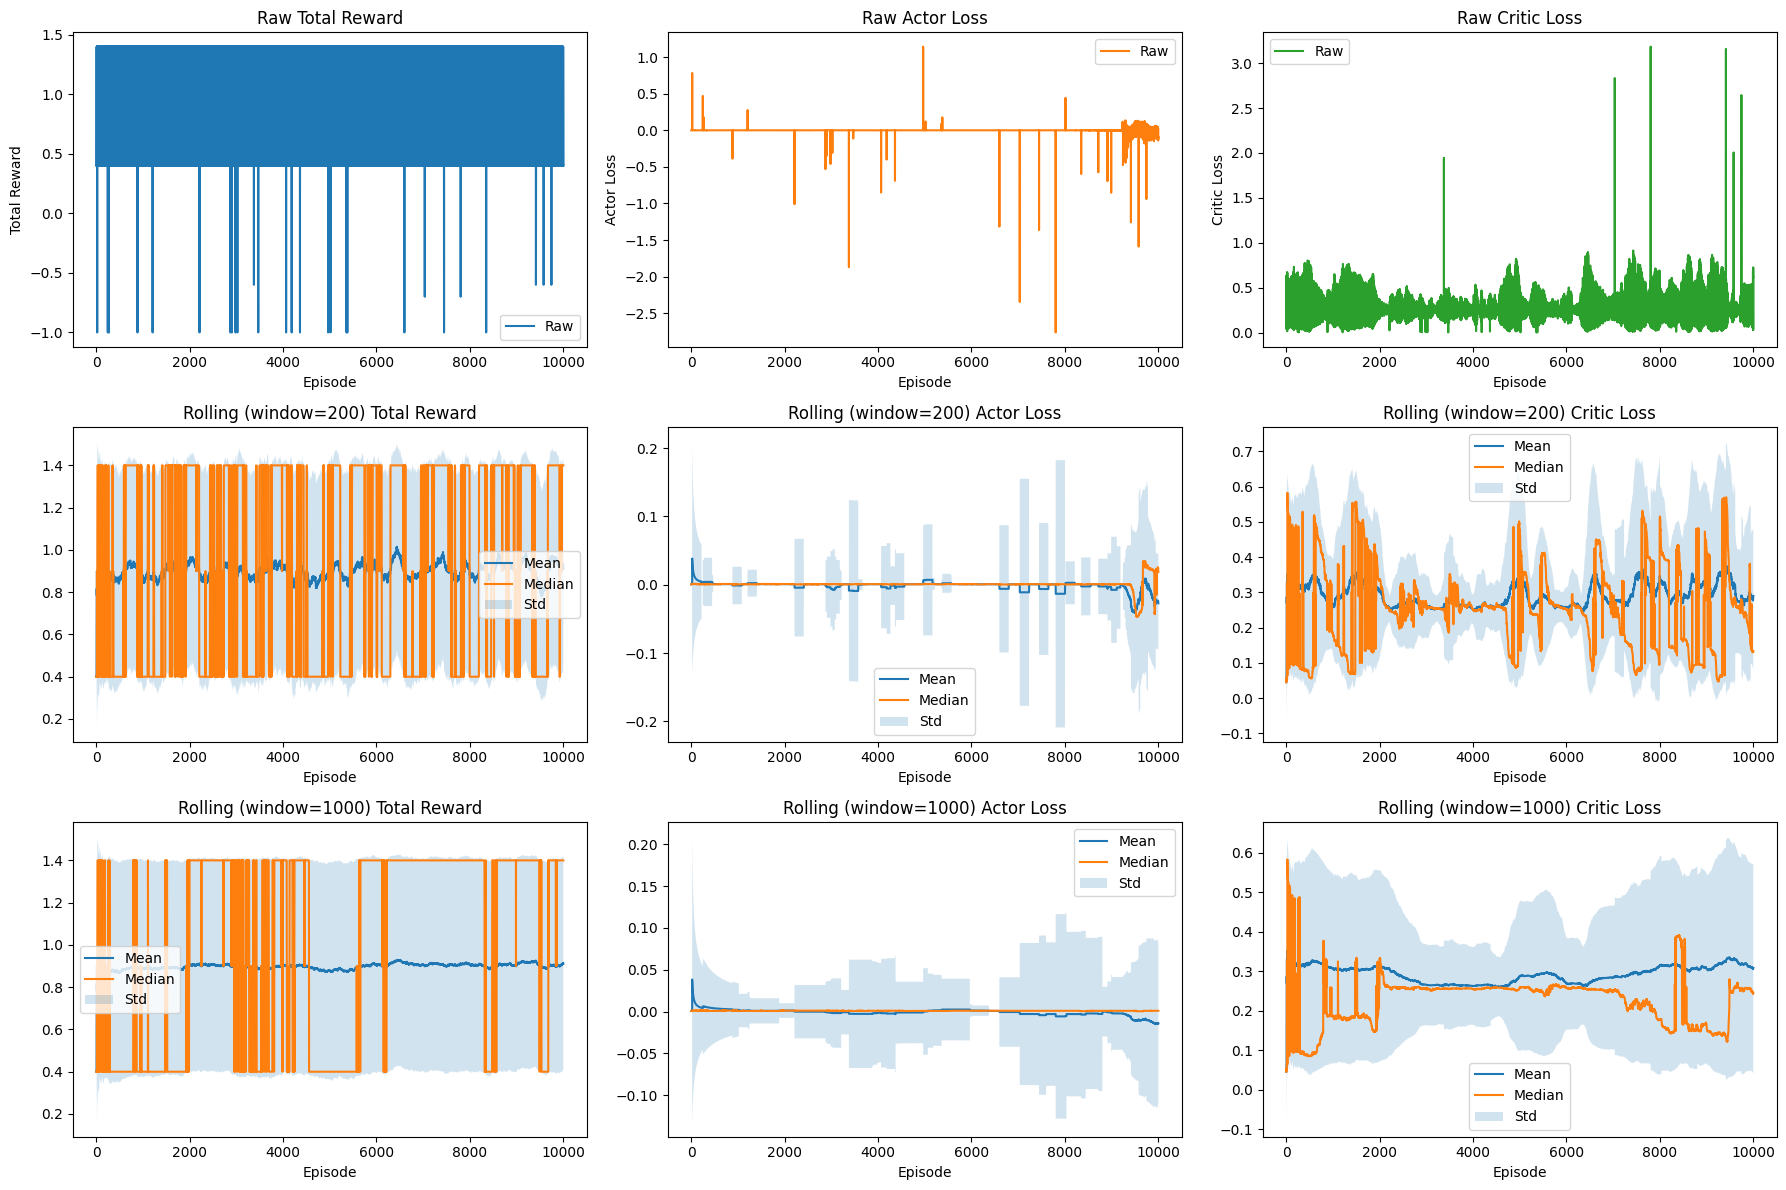

/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules/helper_functions.py:937: RuntimeWarning: Mean of empty slice
  mean_rate_per_episode = np.nanmean(firing_rates, axis=0)


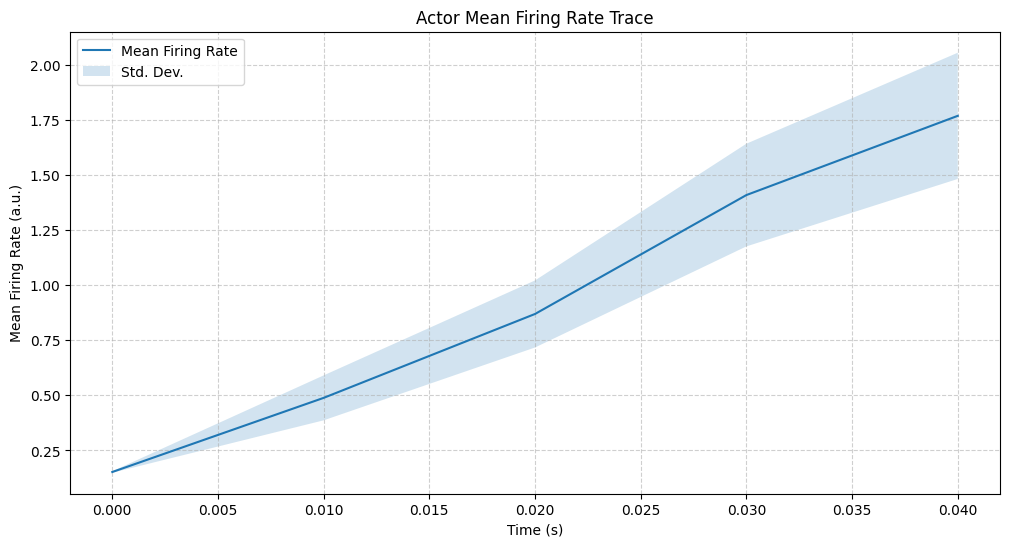


Closing the environment...
Environment closed.


: 

In [ ]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.05,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 64,
        "critic_hidden_size": 64,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 7
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 7
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM_F_rnn_7.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  input_noise_sigma: 0.05
  reward_fixation: 0.1
  reward_decide_fixation: -0.1
  duration_params: [10, 10, 10, 10, 10, 10]
  actor_hidden_size: 64
  critic_hidden_size: 64
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: True

Creating WorkingMemory environment...
Observation size: 3, Action size: 3

Initializing Actor-Critic Agent...


2025-08-06 22:06:05.760994: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 7...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/WM_F_rnn_7/ckpt-1
Checkpoint restored successfully.

Starting training for 10000 episodes...
Episode 100	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.1213	Critic Loss: 0.8050	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 200	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.0921	Critic Loss: 0.5113	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 300	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.1239	Critic Loss: 0.6982	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 400	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.0646	Critic Loss: 0.2883	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 500	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0800	Critic Loss: 0.2164	Actions: [0, 0, 0, 0, 2]	M

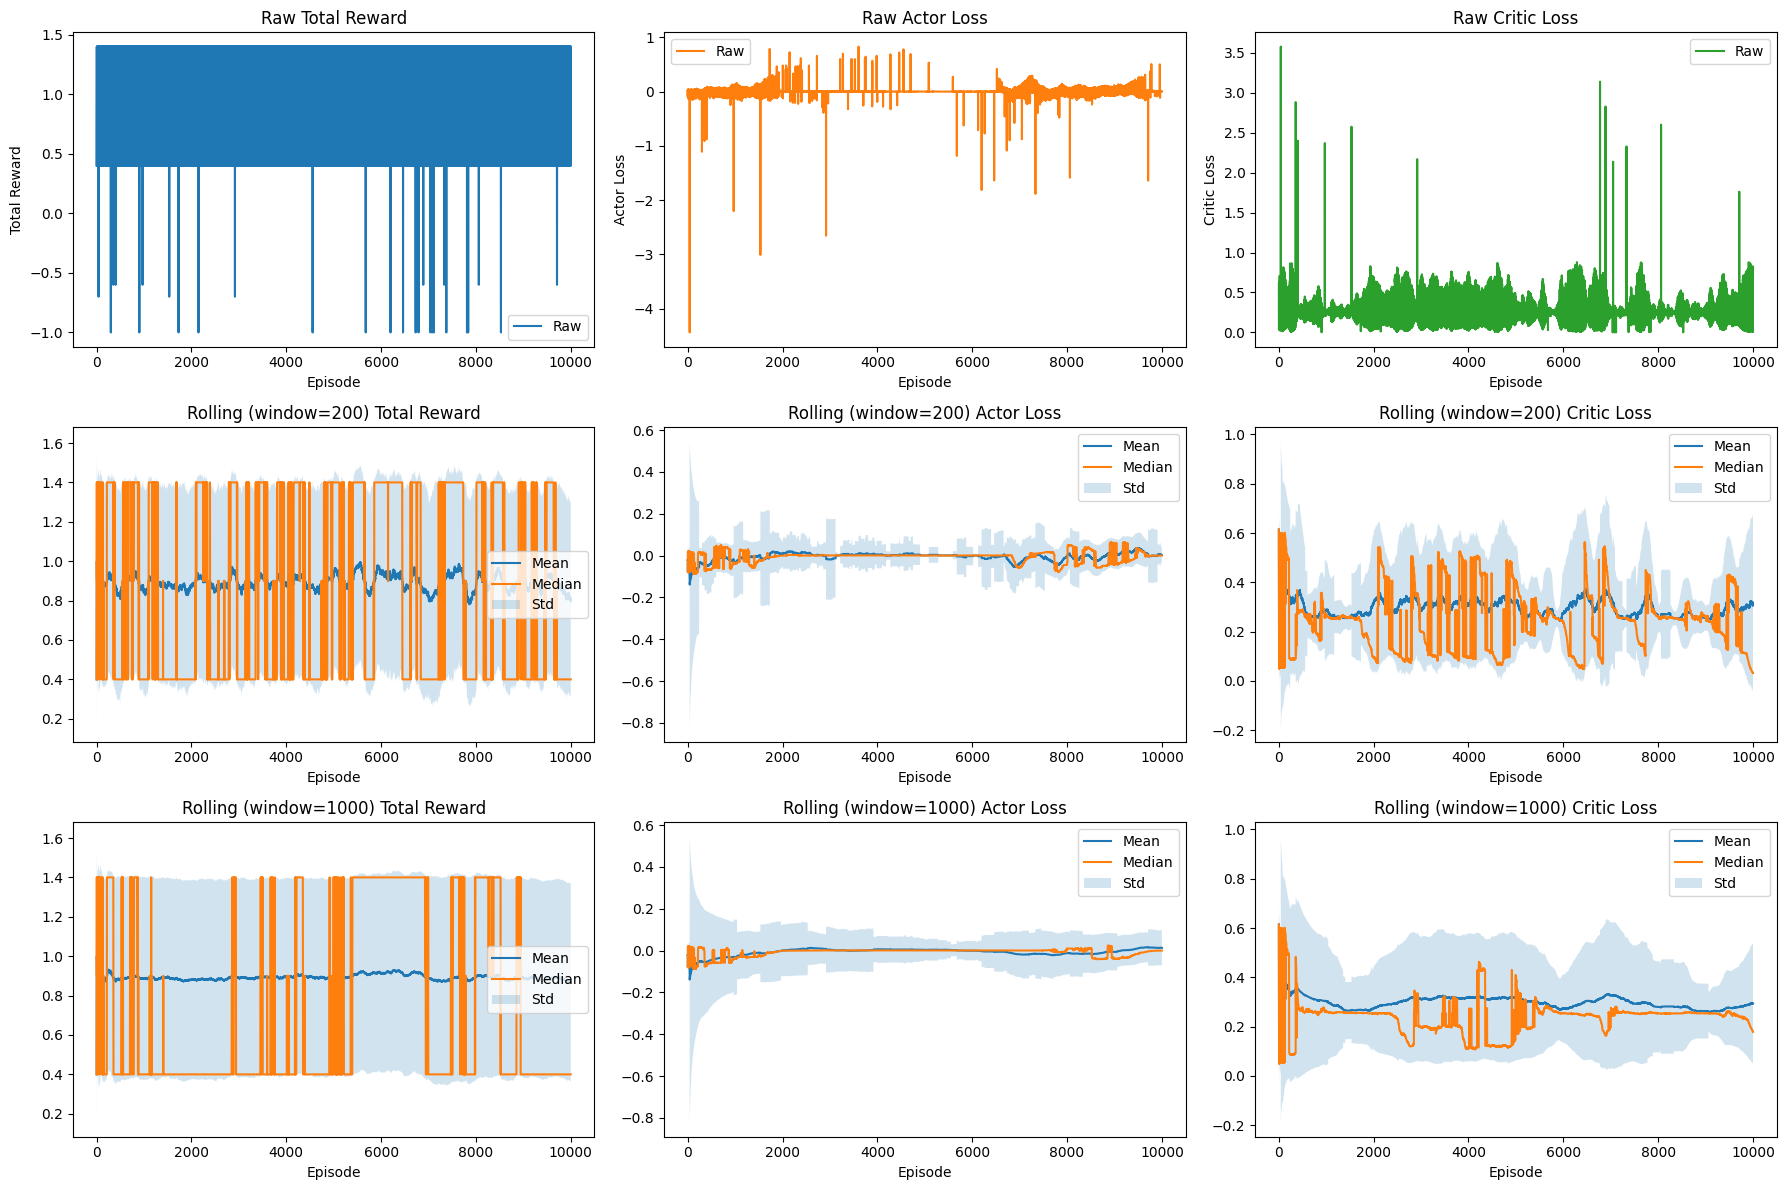

/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules/helper_functions.py:937: RuntimeWarning: Mean of empty slice
  mean_rate_per_episode = np.nanmean(firing_rates, axis=0)


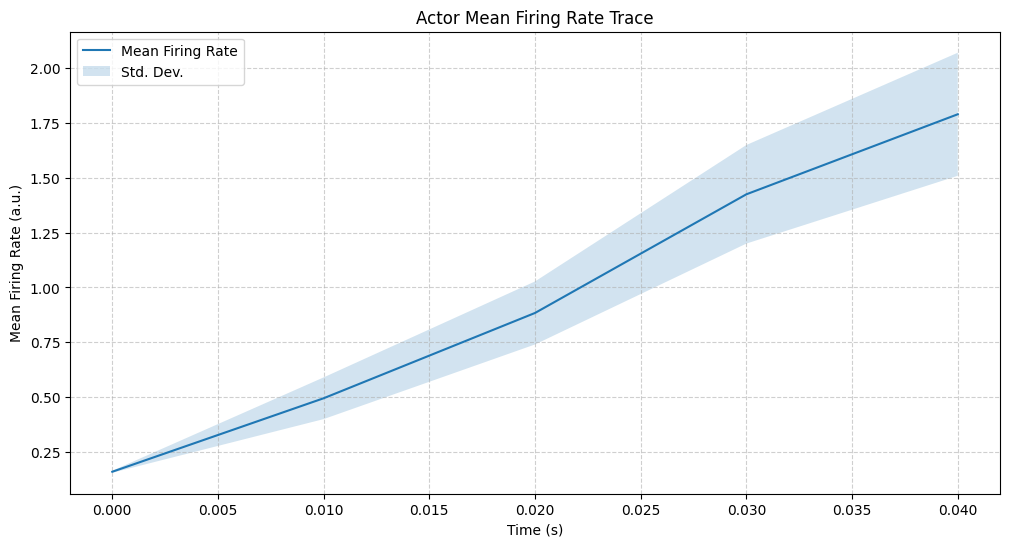


Closing the environment...
Environment closed.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.05,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 64,
        "critic_hidden_size": 64,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 8
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 8
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM_F_rnn_8.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  input_noise_sigma: 0.05
  reward_fixation: 0.1
  reward_decide_fixation: -0.1
  duration_params: [10, 10, 10, 10, 10, 10]
  actor_hidden_size: 64
  critic_hidden_size: 64
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: True

Creating WorkingMemory environment...
Observation size: 3, Action size: 3

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Loading masks from stage 8...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/WM_F_rnn_8/ckpt-1
Checkpoint restored successfully.

Starting training for 10000 episodes...
Episode 100	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.0015	Critic Loss: 0.0533	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 200	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.0009	Critic Loss: 0.1417	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 300	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0030	Critic Loss: 0.3460	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 400	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0038	Critic Loss: 0.4524	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 500	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0023	Critic Loss: 0.3956	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 600	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.1977	Critic Loss: 0.0742	Actions: [0, 0, 0, 0, 

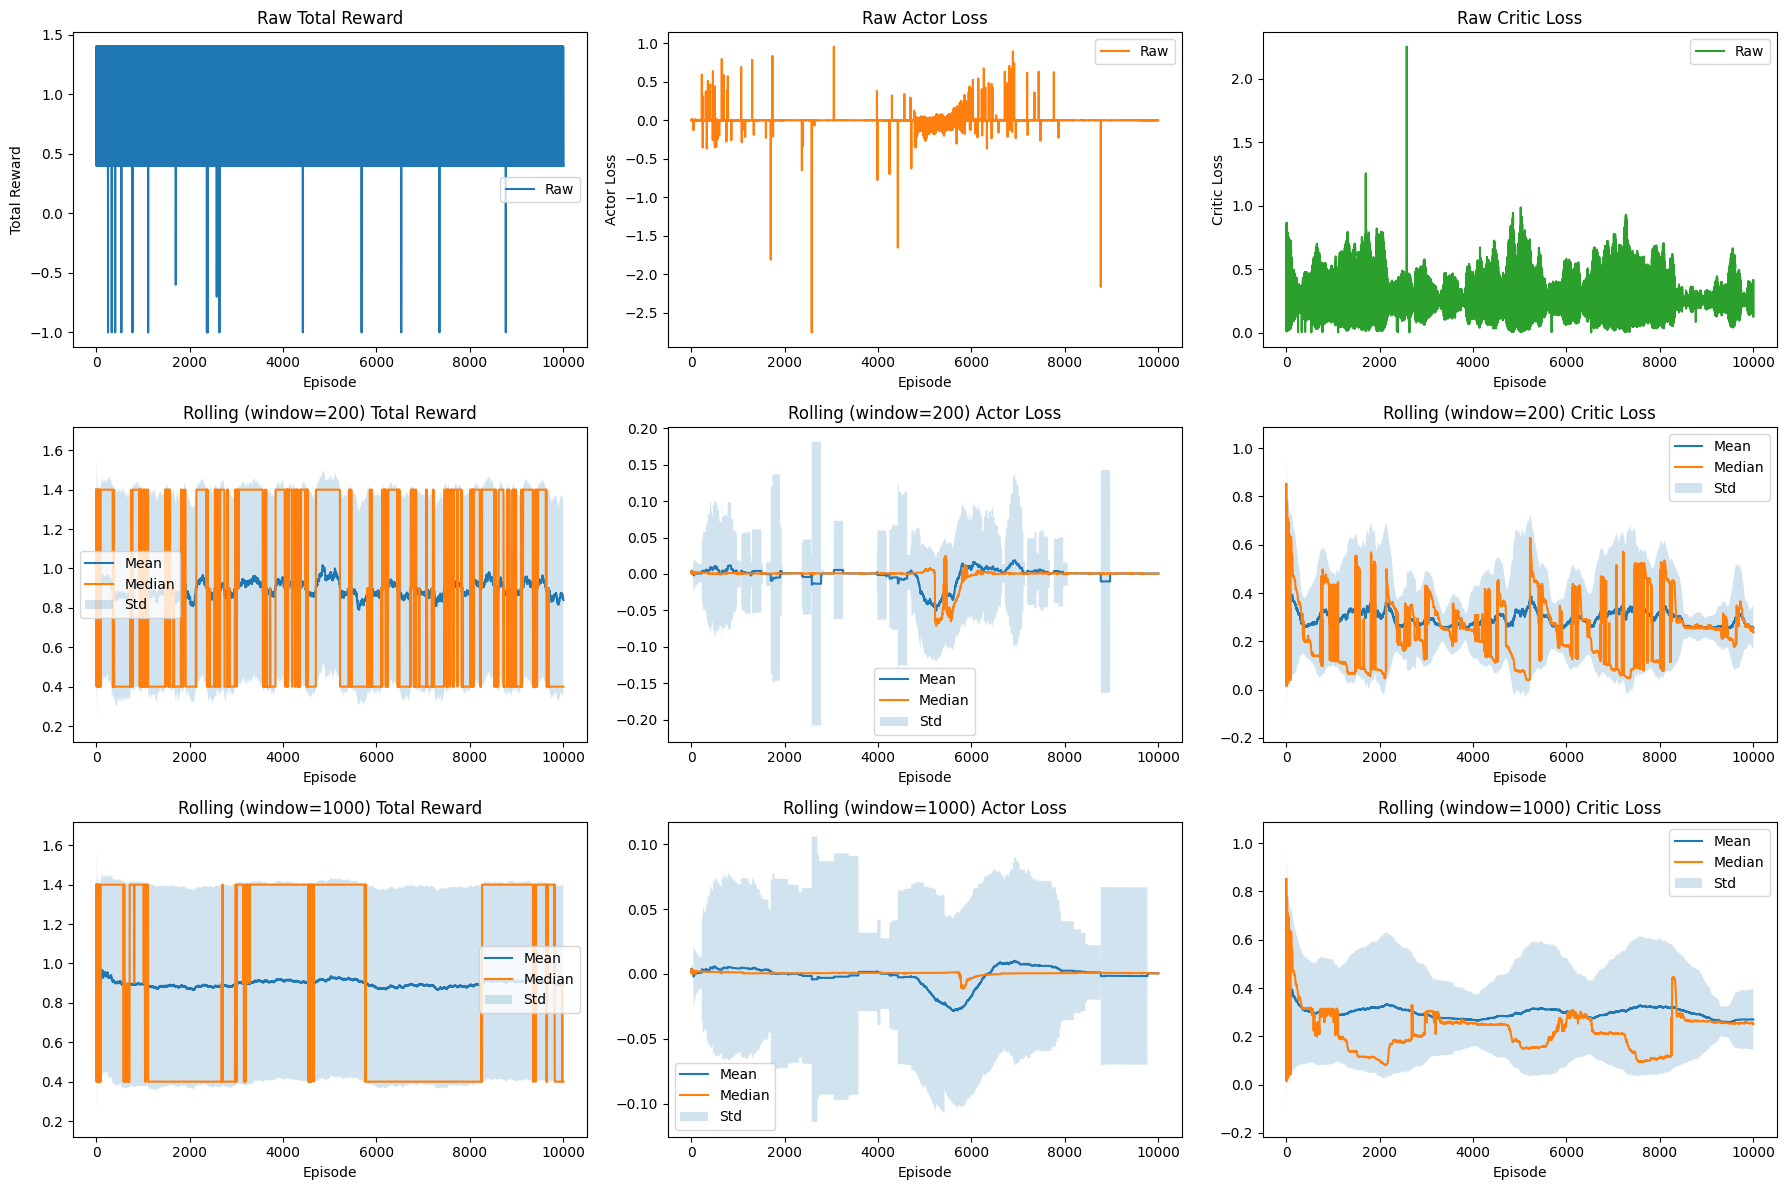

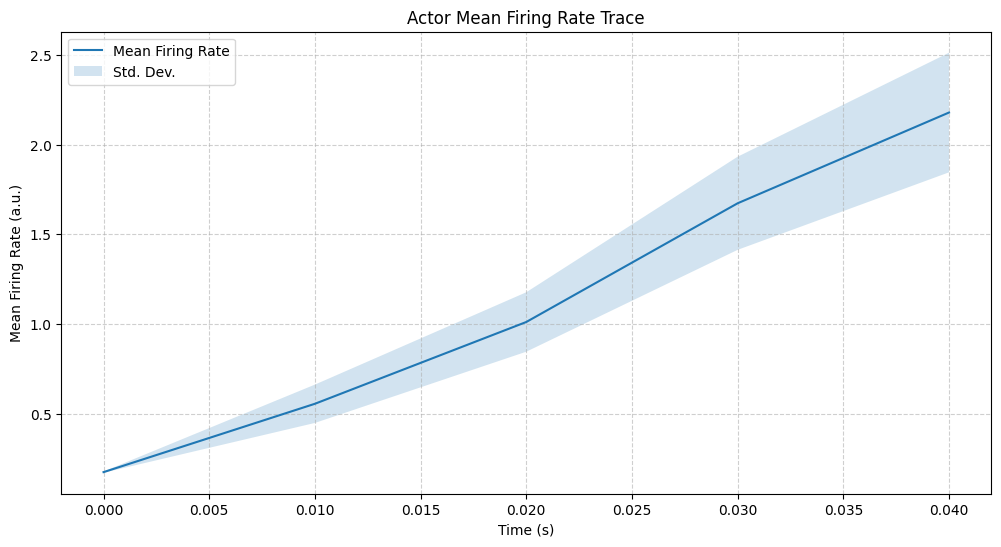


Closing the environment...
Environment closed.


In [3]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.05,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 64,
        "critic_hidden_size": 64,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 9
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 9
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM_F_rnn_9.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

In [ ]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.05,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 64,
        "critic_hidden_size": 64,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 10
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 10
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM_F_rnn_10.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  input_noise_sigma: 0.05
  reward_fixation: 0.1
  reward_decide_fixation: -0.1
  duration_params: [10, 10, 10, 10, 10, 10]
  actor_hidden_size: 64
  critic_hidden_size: 64
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: True

Creating WorkingMemory environment...
Observation size: 3, Action size: 3

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Loading masks from stage 9...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/WM_F_rnn_9/ckpt-1
Checkpoint restored successfully.

Starting training for 10000 episodes...
Episode 100	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0026	Critic Loss: 0.5083	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 200	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: 0.0001	Critic Loss: 0.0659	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 300	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: 0.0006	Critic Loss: 0.0201	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 400	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0018	Critic Loss: 0.5765	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 500	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0015	Critic Loss: 0.5470	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 600	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: 0.0005	Critic Loss: 0.0576	Actions: [0, 0, 0, 0, 2]	

In [ ]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.05,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 64,
        "critic_hidden_size": 64,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 11
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 11
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM_F_rnn_11.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

#### BAJAR LEARNING RATE

In [ ]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.05,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 64,
        "critic_hidden_size": 64,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 1e-6,
        "critic_lr": 1e-6,
        "num_episodes": 5000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 8
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 8
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM_F_rnn_8.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  input_noise_sigma: 0.05
  reward_fixation: 0.1
  reward_decide_fixation: -0.1
  duration_params: [10, 10, 10, 10, 10, 10]
  actor_hidden_size: 64
  critic_hidden_size: 64
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 1e-06
  critic_lr: 1e-06
  num_episodes: 5000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: True

Creating WorkingMemory environment...
Observation size: 3, Action size: 3

Initializing Actor-Critic Agent...


2025-08-21 12:01:03.757332: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 7...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/WM_F_rnn_7/ckpt-1
Checkpoint restored successfully.

Starting training for 5000 episodes...
Episode 100	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.1050	Critic Loss: 0.6798	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 200	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.0845	Critic Loss: 0.5347	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 300	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0414	Critic Loss: 0.0994	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 400	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.0742	Critic Loss: 0.4686	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 500	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.0800	Critic Loss: 0.3801	Actions: [0, 0, 0, 0, 1]	M:

Configuration loaded:
  dt: 10
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  input_noise_sigma: 0.05
  reward_fixation: 0.1
  reward_decide_fixation: -0.1
  duration_params: [10, 10, 10, 10, 10, 10]
  actor_hidden_size: 64
  critic_hidden_size: 64
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 5e-05
  critic_lr: 5e-05
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: True

Creating WorkingMemory environment...
Observation size: 3, Action size: 3

Initializing Actor-Critic Agent...


2025-08-08 02:08:09.338213: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 8...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/WM_F_rnn_8/ckpt-1
Checkpoint restored successfully.

Starting training for 10000 episodes...
Episode 100	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.1549	Critic Loss: 0.3353	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 200	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0372	Critic Loss: 0.4163	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 300	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.0095	Critic Loss: 0.0559	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 400	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0179	Critic Loss: 0.3915	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 500	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.1726	Critic Loss: 0.1373	Actions: [0, 0, 0, 0, 2]	M:

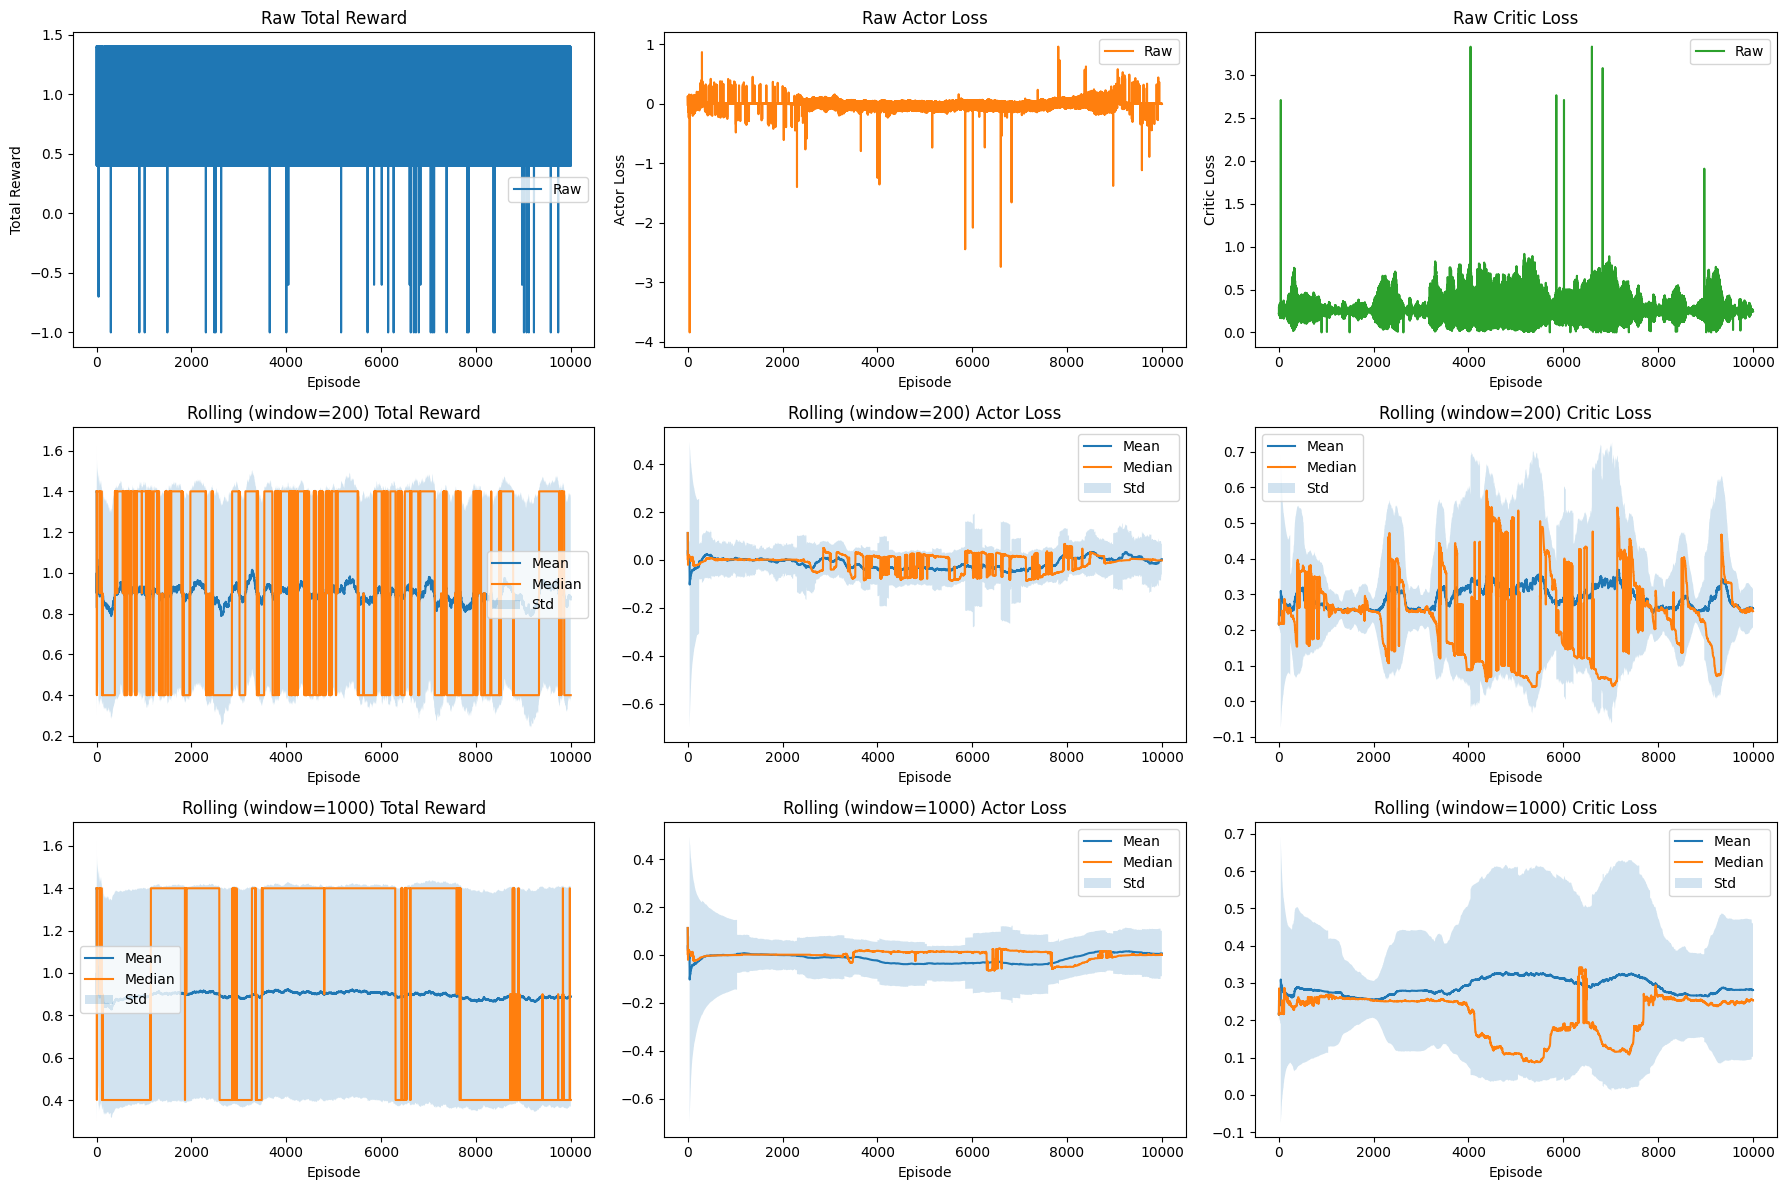

/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules/helper_functions.py:937: RuntimeWarning: Mean of empty slice
  mean_rate_per_episode = np.nanmean(firing_rates, axis=0)


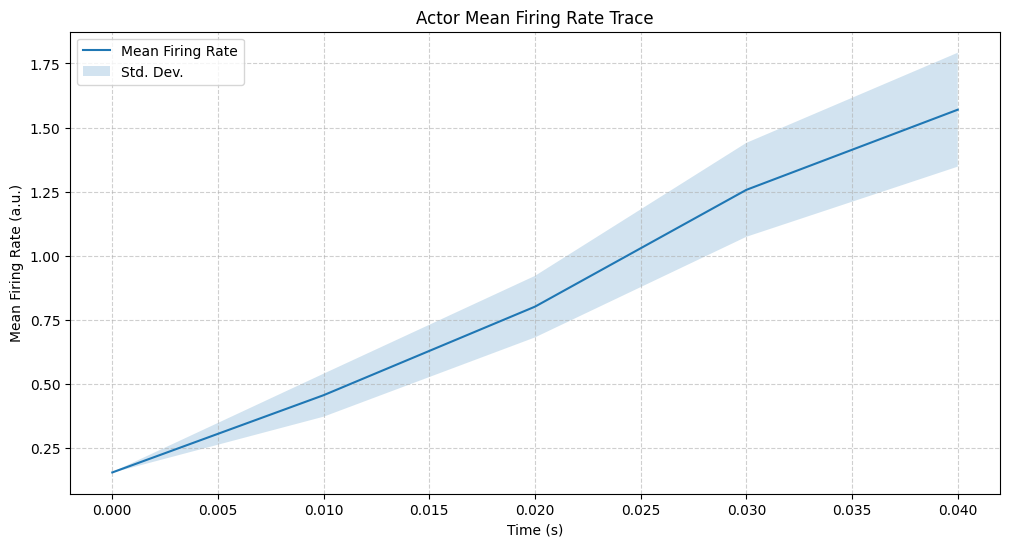


Closing the environment...
Environment closed.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.05,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 64,
        "critic_hidden_size": 64,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 5e-5,
        "critic_lr": 5e-5,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 9
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 9
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM_F_rnn_9.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

In [ ]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.05,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 64,
        "critic_hidden_size": 64,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 5e-5,
        "critic_lr": 5e-5,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 10
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 10
    this_ckpt_dir = 'checkpoints/WM_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM_F_rnn_10.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  input_noise_sigma: 0.05
  reward_fixation: 0.1
  reward_decide_fixation: -0.1
  duration_params: [10, 10, 10, 10, 10, 10]
  actor_hidden_size: 64
  critic_hidden_size: 64
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 5e-05
  critic_lr: 5e-05
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: True

Creating WorkingMemory environment...
Observation size: 3, Action size: 3

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Loading masks from stage 9...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/WM_F_rnn_9/ckpt-1
Checkpoint restored successfully.

Starting training for 10000 episodes...
Episode 100	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.3345	Critic Loss: 0.2783	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 200	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0027	Critic Loss: 0.1448	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 300	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0032	Critic Loss: 0.0422	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 400	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.0290	Critic Loss: 0.7445	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 500	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0142	Critic Loss: 0.0233	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 600	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.0558	Critic Loss: 0.5129	Actions: [0, 0, 0, 0, 2